In [3]:
##IMPORT PACKAGES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:
##TURN THE DUPLICATED BEDGRAPH FILE FOR E5.5 INTO A DATAFRAME
df1 = pd.read_csv("mm10_refseq_genes_chr6_50M_60M.bed", sep='\t', header=None)
df1

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,967,NM_001164734,chr6,+,50110240,50198598,50145775,50198330,14,"50110240,50143718,50145773,50158681,50162585,5...","50110464,50143784,50145892,50158834,50162735,5...",0,Mpp6,cmpl,cmpl,"-1,-1,0,0,0,0,0,0,0,1,1,1,0,0,"
1,967,NM_001164733,chr6,+,50110240,50198598,50145775,50198330,14,"50110240,50143718,50145773,50158681,50162585,5...","50110454,50143784,50145892,50158834,50162735,5...",0,Mpp6,cmpl,cmpl,"-1,-1,0,0,0,0,0,0,0,1,1,1,0,0,"
2,967,NM_019939,chr6,+,50110240,50198598,50145775,50198330,13,"50110240,50143718,50145773,50158681,50162585,5...","50110464,50143784,50145892,50158834,50162735,5...",0,Mpp6,cmpl,cmpl,"-1,-1,0,0,0,0,0,0,1,1,1,0,0,"
3,968,NM_018769,chr6,-,50207402,50261769,50207933,50251486,10,"50207402,50216349,50219236,50220988,50222735,5...","50208206,50216423,50219438,50221116,50222900,5...",0,Dfna5,cmpl,cmpl,"0,1,0,1,1,0,2,1,0,-1,"
4,1,NM_027881,chr6,-,50293326,50382837,50297064,50370215,22,"50293326,50299315,50300923,50303016,50308290,5...","50297161,50299438,50301050,50303161,50308435,5...",0,Osbpl3,cmpl,cmpl,"2,2,1,0,2,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,-1,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,129,NM_028705,chr6,+,58833699,58920396,58843632,58918921,25,"58833699,58843603,58854872,58855737,58856592,5...","58833771,58843858,58855032,58855814,58856814,5...",0,Herc3,cmpl,cmpl,"-1,0,1,2,1,1,0,2,1,0,2,2,0,1,0,0,0,0,0,0,2,0,2..."
148,1034,NM_021432,chr6,-,58905232,58907126,58906496,58906967,1,"58905232,","58907126,",0,Nap1l5,cmpl,cmpl,"0,"
149,129,NM_153574,chr6,-,58933535,59024502,58935584,59024340,18,"58933535,58939295,58940120,58944120,58946039,5...","58935711,58939397,58940317,58944204,58946135,5...",0,Fam13a,cmpl,cmpl,"2,2,0,0,0,0,1,0,2,1,0,2,0,2,2,2,2,0,"
150,1036,NM_001081145,chr6,+,59208869,59212033,59210149,59211727,2,"59208869,59209338,","59209181,59212033,",0,Tigd2,cmpl,cmpl,"-1,0,"


In [5]:
df_E4 = pd.read_csv('E4.0_sorted.bedGraph', sep='\t', comment='t', header=None)
header = ['chrom','chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
df_E4

,0,1,2,3
0,chr6,49999926,49999927,0.000000
1,chr6,49999965,49999966,0.000000
2,chr6,50000074,50000075,0.000000
3,chr6,50000077,50000078,0.000000
4,chr6,50000556,50000557,0.000000
...,...,...,...,...
51623,chr6,59997276,59997277,0.000000
51624,chr6,59998070,59998071,33.333333
51625,chr6,59998551,59998552,0.000000
51626,chr6,59998824,59998825,0.000000


In [6]:
df_E55 = pd.read_csv('E5.5_sorted.bedGraph', sep='\t', comment='t', header=None)
df_E55

,0,1,2,3
0,chr6,50000557,50000558,0.0
1,chr6,50000626,50000627,100.0
2,chr6,50000643,50000644,100.0
3,chr6,50001247,50001248,50.0
4,chr6,50001543,50001544,0.0
...,...,...,...,...
72815,chr6,59998824,59998825,50.0
72816,chr6,59999321,59999322,0.0
72817,chr6,59999436,59999437,0.0
72818,chr6,59999524,59999525,0.0


## Finding the total sum of methyl. scores

In [7]:
df_E4.sum(axis = 0)

0    chr6chr6chr6chr6chr6chr6chr6chr6chr6chr6chr6ch...
1                                        2817408078743
2                                        2817408130371
3                                               986254
dtype: object

In [8]:
Total_methyl_E4 = df_E4[3].sum()
Total_methyl_E4

986254.4471654277

In [9]:
Total_methyl_E5 = df_E55[3].sum()
Total_methyl_E5

4614424.723092603

In [10]:
##Importing the promoter bed file into a dataframe
df_promoters = pd.read_csv('promoters.bed', sep='\t', comment='t', header=None)
df_promoters

,0,1,2,3,4,5
0,chr6,50108240,50110240,Mpp6,0.0,+
1,chr6,50261769,50263769,Dfna5,0.0,-
2,chr6,50382837,50384837,Osbpl3,0.0,-
3,chr6,50566474,50568474,Cycs,0.0,-
4,chr6,50570397,50572397,Mir6371,0.0,+
...,...,...,...,...,...,...
102,chr6,58831699,58833699,Herc3,0.0,+
103,chr6,58907126,58909126,Nap1l5,0.0,-
104,chr6,59024502,59026502,Fam13a,0.0,-
105,chr6,59206869,59208869,Tigd2,0.0,+


## Convert the bed graph files into an dict and combine them with the promter bed file for E4 and E5

In [11]:
ref = open('promoters.bed', 'r')
E4 = open('E4.0_sorted.bedGraph')
E5 = open('E5.5_sorted.bedGraph')

In [12]:
E4_dict = {} 

for line in ref:
    col = line.split('\t')
    E4_val = 0 
    gname = col[3] 
    start_val = int(col[1]) 
    end_val = int(col[2]) 
    for line2 in E4: 
        if "track" in line2: 
            continue
        else:
            col2 = line2.split() 
            if int(col2[1]) >= start_val and int(col2[1]) <= end_val: 
                E4_val += float(col2[3]) 
                E4_dict[gname] = E4_val 
    E4.seek(0)
    
print(E4_dict)

{'Mpp6': 0.0, 'Dfna5': 0.0, 'Osbpl3': 0.0, 'Cycs': 133.33333333333331, 'Mir6371': 700.0, 'Npvf': 300.0, 'Mir148a': 0.0, 'Gm6559': 100.0, 'Nfe2l3': 100.0, 'Cbx3': 50.0, 'Hnrnpa2b1': 150.0, 'Snx10': 100.0, 'Skap2': 50.0, 'Halr1': 100.0, 'Hotairm1': 0.0, 'Hoxa1': 100.0, 'Hoxaas2': 0.0, 'Hoxa2': 100.0, 'Hoxa4': 0.0, 'Hoxaas3': 450.0, 'Hoxa5': 100.0, 'Hoxa6': 100.0, 'Hoxa3': 500.0, 'Mira': 200.0, 'Hoxa7': 310.0, 'Hoxa9': 400.0, 'Mir196b': 200.0, 'Hoxa10': 0.0, 'Hoxa11os': 200.0, 'Hoxa11': 0.0, 'Hottip': 400.0, 'Hoxa13': 400.0, 'Evx1': 0.0, 'Evx1os': 600.0, 'Hibadh': 50.0, 'Tax1bp1': 66.6666666666667, 'Jazf1': 300.0, 'Gm4872': 550.0, 'Creb5': 200.0, 'Tril': 0.0, 'Cpvl': 300.0, 'Chn2': 500.0, 'Prr15': 0.0, 'Wipf3': 100.0, 'Scrn1': 100.0, 'Plekha8': 50.0, 'Fkbp14': 50.0, 'Mturn': 0.0, 'Znrf2': 50.0, 'Nod1': 116.6666666666667, 'Ggct': 0.0, 'Gars': 200.0, 'Crhr2': 200.0, 'Inmt': 100.0, 'Fam188b': 0.0, 'Aqp1': 100.0, 'Ghrhr': 0.0, 'Adcyap1r1': 100.0, 'Neurod6': 200.0, 'Gm3279': 700.0, 'Ccdc129': 

In [13]:
ref = open('promoters.bed', 'r')
E4 = open('E4.0_sorted.bedGraph')
E5 = open('E5.5_sorted.bedGraph')

In [14]:
E5_dict = {} 

for line in ref:
    col = line.split('\t')
    E5_val = 0 
    gname = col[3] 
    start_val = int(col[1]) 
    end_val = int(col[2]) 
    for line2 in E5: 
        if "track" in line2: 
            continue
        else:
            col2 = line2.split()
            if int(col2[1]) >= start_val and int(col2[1]) <= end_val: 
                E5_val += float(col2[3]) 
                E5_dict[gname] = E5_val 
    E5.seek(0)
    
print(E5_dict)

{'Mpp6': 100.0, 'Dfna5': 950.0, 'Osbpl3': 1650.0, 'Cycs': 650.0, 'Mir6371': 1916.6666666666667, 'Npvf': 1383.3333333333335, 'Mir148a': 400.0, 'Gm6559': 1433.3333333333333, 'Nfe2l3': 1083.3333333333335, 'Cbx3': 0.0, 'Hnrnpa2b1': 0.0, 'Snx10': 700.0, 'Skap2': 250.0, 'Halr1': 2900.0000000000005, 'Hotairm1': 50.0, 'Hoxa1': 0.0, 'Hoxaas2': 0.0, 'Hoxa2': 0.0, 'Hoxa4': 750.0, 'Hoxaas3': 450.0, 'Hoxa5': 283.3333333333333, 'Hoxa6': 500.0, 'Hoxa3': 183.33333333333331, 'Mira': 400.0, 'Hoxa7': 266.66666666666663, 'Hoxa9': 0.0, 'Mir196b': 450.0, 'Hoxa10': 616.6666666666667, 'Hoxa11os': 0.0, 'Hoxa11': 100.0, 'Hottip': 100.0, 'Hoxa13': 100.0, 'Evx1': 200.0, 'Evx1os': 550.0, 'Hibadh': 666.6666666666667, 'Tax1bp1': 600.0, 'Jazf1': 966.6666666666667, 'Gm4872': 1841.6666666666667, 'Creb5': 250.0, 'Tril': 650.0, 'Cpvl': 1050.0, 'Chn2': 400.0, 'Prr15': 950.0, 'Wipf3': 1450.0, 'Scrn1': 800.0, 'Plekha8': 300.0, 'Fkbp14': 300.0, 'Mturn': 383.3333333333333, 'Znrf2': 924.9999999999998, 'Nod1': 1426.666666666666

In [45]:
df_E4_sums= pd.DataFrame(E4_dict.items(), columns=['Promoter', 'Methylation_score'])
df_E4_sums_sorted = df_E4_sums.sort_values(by = 'Methylation_score')
df_E4_sums_sorted

,Promoter,Methylation_score
0,Mpp6,0.000000
32,Evx1,0.000000
39,Tril,0.000000
42,Prr15,0.000000
47,Mturn,0.000000
...,...,...
37,Gm4872,550.000000
33,Evx1os,600.000000
59,Gm3279,700.000000
4,Mir6371,700.000000


## Plot the methylation score for E4

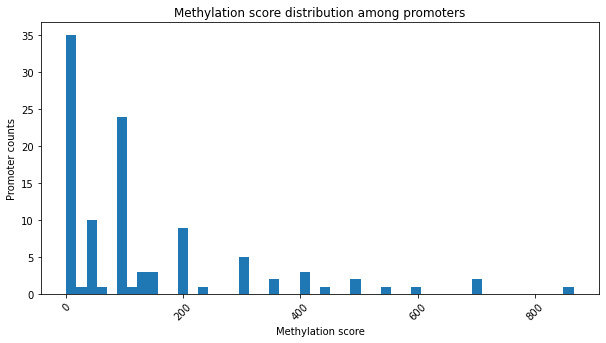

In [16]:
fig, ax = plt.subplots(figsize=(10,5))
ax.hist(df_E4_sums ['Methylation_score'],bins=50)
ax.set_title('Methylation score distribution among promoters')
ax.set_xlabel('Methylation score')
ax.set_ylabel('Promoter counts')
plt.xticks(rotation=45)
plt.show()

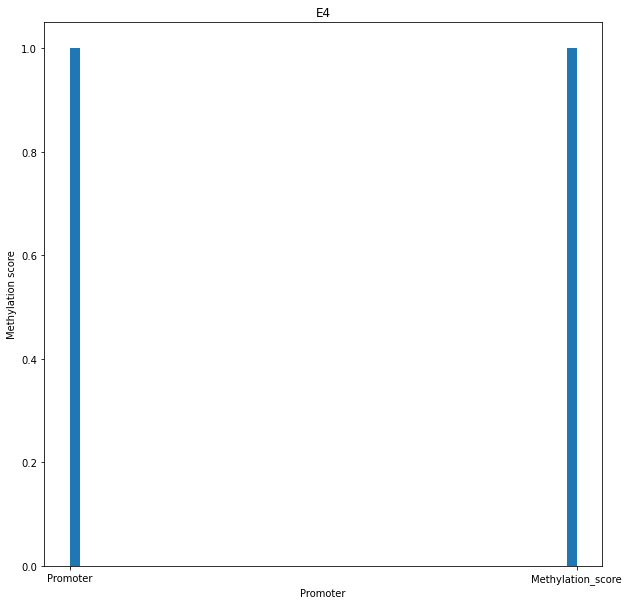

In [17]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df_E4_sums_sorted,bins=50)
ax.set_title('E4')
ax.set_xlabel('Promoter')
ax.set_ylabel('Methylation score')
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'x_label'

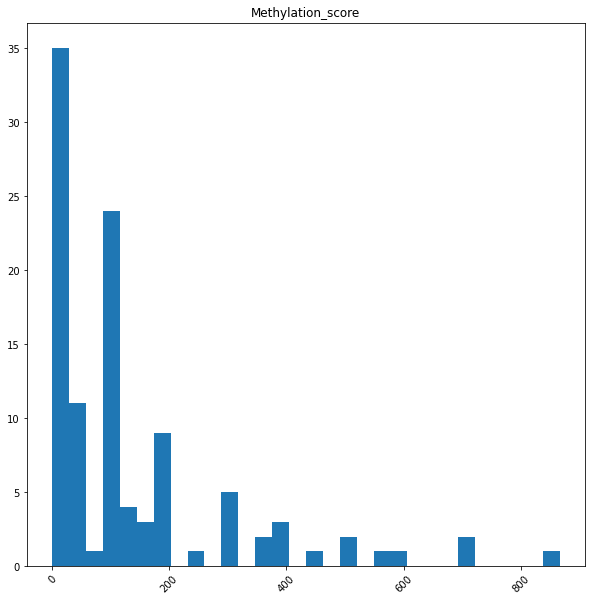

In [18]:
hist = df_E4_sums.hist(bins=30, figsize=(10,10), xrot=45, grid=False)
hist.x_label('xlabel')
ax.set_title('E4')
ax.set_xlabel("x label")
ax.set_ylabel("y label")

In [19]:
E4_data = list(E4_dict.items())
E4_array = np.array(E4_data)
E4_array

array([['Mpp6', '0.0'],
       ['Dfna5', '0.0'],
       ['Osbpl3', '0.0'],
       ['Cycs', '133.33333333333331'],
       ['Mir6371', '700.0'],
       ['Npvf', '300.0'],
       ['Mir148a', '0.0'],
       ['Gm6559', '100.0'],
       ['Nfe2l3', '100.0'],
       ['Cbx3', '50.0'],
       ['Hnrnpa2b1', '150.0'],
       ['Snx10', '100.0'],
       ['Skap2', '50.0'],
       ['Halr1', '100.0'],
       ['Hotairm1', '0.0'],
       ['Hoxa1', '100.0'],
       ['Hoxaas2', '0.0'],
       ['Hoxa2', '100.0'],
       ['Hoxa4', '0.0'],
       ['Hoxaas3', '450.0'],
       ['Hoxa5', '100.0'],
       ['Hoxa6', '100.0'],
       ['Hoxa3', '500.0'],
       ['Mira', '200.0'],
       ['Hoxa7', '310.0'],
       ['Hoxa9', '400.0'],
       ['Mir196b', '200.0'],
       ['Hoxa10', '0.0'],
       ['Hoxa11os', '200.0'],
       ['Hoxa11', '0.0'],
       ['Hottip', '400.0'],
       ['Hoxa13', '400.0'],
       ['Evx1', '0.0'],
       ['Evx1os', '600.0'],
       ['Hibadh', '50.0'],
       ['Tax1bp1', '66.6666666666667'],
  

In [ ]:
#E4_histo = plt.hist(narray, bins = 50)

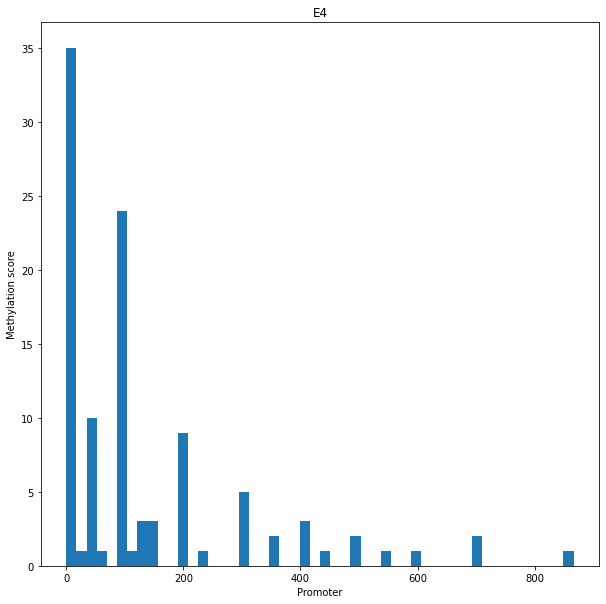

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
ax.hist(df_E4_sums_sorted ['Methylation_score'],bins=50)
ax.set_title('E4')
ax.set_xlabel('Promoter')
ax.set_ylabel('Methylation score')
plt.show()

In [22]:
df_E4_sums = pd.DataFrame(E4_array, columns = ['promoter','methylations'])
df_E4_sums_sorted = df_E4_sums.sort_values(by = 'methylations')
df_E4_sums_sorted 

,promoter,methylations
0,Mpp6,0.0
32,Evx1,0.0
39,Tril,0.0
42,Prr15,0.0
47,Mturn,0.0
...,...,...
33,Evx1os,600.0
35,Tax1bp1,66.6666666666667
59,Gm3279,700.0
4,Mir6371,700.0


AttributeError: 'tuple' object has no attribute 'set_title'

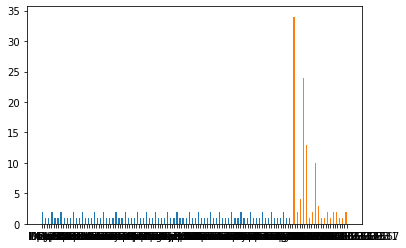

In [23]:
ax = plt.hist(E4_array, bins = 100)
ax.set_title('E4')

## Making the scatter plot

In [73]:
df_E4_sums= pd.DataFrame(E4_dict.items(), columns=['Promoter', 'Methylation_score'])
df_E4_sums_sorted = df_E4_sums.sort_values(by = 'Methylation_score')
df_E4_sums_sorted

,Promoter,Methylation_score
0,Mpp6,0.000000
32,Evx1,0.000000
39,Tril,0.000000
42,Prr15,0.000000
47,Mturn,0.000000
...,...,...
37,Gm4872,550.000000
33,Evx1os,600.000000
59,Gm3279,700.000000
4,Mir6371,700.000000


In [74]:
df_E5_sums= pd.DataFrame(E5_dict.items(), columns=['Promoter', 'Methylation_score'])
df_E5_sums_sorted = df_E5_sums.sort_values(by = 'Methylation_score')
df_E5_sums_sorted

,Promoter,Methylation_score
28,Hoxa11os,0.000000
25,Hoxa9,0.000000
17,Hoxa2,0.000000
16,Hoxaas2,0.000000
9,Cbx3,0.000000
...,...,...
2,Osbpl3,1650.000000
59,Gm3279,1716.666667
37,Gm4872,1841.666667
4,Mir6371,1916.666667


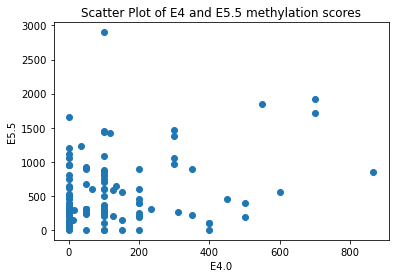

In [87]:
a= df_E4_sums.loc[0:105,"Methylation_score"]
b=df_E5_sums.loc[0:105,"Methylation_score"]
fig, ax = plt.subplots()
ax.scatter(a, b)
ax.set_title('Scatter Plot of E4 and E5.5 methylation scores')
ax.set_xlabel("E4.0")
ax.set_ylabel("E5.5")
plt.show()

## T-Test and P-values

In [31]:
from scipy import stats

In [35]:
stats.ttest_ind(df_E4_sums_sorted ["Methylation_score"],df_E5_sums_sorted["Methylation_score"])

Ttest_indResult(statistic=-8.609012786513777, pvalue=1.7115222072877864e-15)

In [36]:
stats.ttest_ind(df_E5_sums_sorted ["Methylation_score"],df_E4_sums_sorted["Methylation_score"])

Ttest_indResult(statistic=8.609012786513777, pvalue=1.7115222072877864e-15)